In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pickle
from numba import njit, prange

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#Generating random spin configuration 
def randomstate(N):
    return 2 * np.random.randint(2, size=(N, N)) - 1
    
#Metropolis Algorithm to generate the data
@njit(parallel=True) # simple parallel for loop
def metropolis_step(lat, T):
    for _ in prange(N * N):
        x, y = np.random.randint(0, N), np.random.randint(0, N)
        dE = 2 * lat[x, y] * (lat[(x + 1) % N, y] + lat[x, (y + 1) % N] + # Periodic boundary conditions
                       lat[(x - 1) % N, y] + lat[x, (y - 1) % N])
        if dE < 0:
            lat[x, y] *= -1
        elif np.random.rand() < np.exp(-dE / T):
            lat[x, y] *= -1

In [3]:
# Saves data
def save(object, filename):
    with open(filename + '.pickle', 'wb') as f:
        pickle.dump(object, f)
        
#parameters for the simulation
N = 16
Tc = 2.269
MCstep = 5000
EQstep = 2000
n_temp = 1000

T = np.linspace(1., 3.5, n_temp)
mag = []

In [4]:
# Initializing spins and labels
spins, labels = np.zeros((0, N * N)), np.zeros((0, 2))
high, low = np.array([1, 0]), np.array([0, 1])


In [5]:
#simulation of the data
for index, temp in enumerate(T):
    tmp = []
    lat = randomstate(N)

    # Equilibrate spin lat
    for _ in range(EQstep):
        metropolis_step(lat, temp)

    # Loop over spin configurations to collect data
    for mc in range(MCstep):
        if mc % 200 == 0:
            tmp.append(np.sum(lat))
        metropolis_step(lat, temp)
    spins = np.vstack((spins, lat.ravel()))

    # Append correct label corresponding to current spin configuration
    if temp < Tc:
        labels = np.vstack((labels, low))
    else:
        labels = np.vstack((labels, high))

    mag.append(np.mean(tmp) / (N * N))
    print('{} / {}  steps'.format(index, len(T)))

0 / 1000  steps
1 / 1000  steps
2 / 1000  steps
3 / 1000  steps
4 / 1000  steps
5 / 1000  steps
6 / 1000  steps
7 / 1000  steps
8 / 1000  steps
9 / 1000  steps
10 / 1000  steps
11 / 1000  steps
12 / 1000  steps
13 / 1000  steps
14 / 1000  steps
15 / 1000  steps
16 / 1000  steps
17 / 1000  steps
18 / 1000  steps
19 / 1000  steps
20 / 1000  steps
21 / 1000  steps
22 / 1000  steps
23 / 1000  steps
24 / 1000  steps
25 / 1000  steps
26 / 1000  steps
27 / 1000  steps
28 / 1000  steps
29 / 1000  steps
30 / 1000  steps
31 / 1000  steps
32 / 1000  steps
33 / 1000  steps
34 / 1000  steps
35 / 1000  steps
36 / 1000  steps
37 / 1000  steps
38 / 1000  steps
39 / 1000  steps
40 / 1000  steps
41 / 1000  steps
42 / 1000  steps
43 / 1000  steps
44 / 1000  steps
45 / 1000  steps
46 / 1000  steps
47 / 1000  steps
48 / 1000  steps
49 / 1000  steps
50 / 1000  steps
51 / 1000  steps
52 / 1000  steps
53 / 1000  steps
54 / 1000  steps
55 / 1000  steps
56 / 1000  steps
57 / 1000  steps
58 / 1000  steps
59 / 10

462 / 1000  steps
463 / 1000  steps
464 / 1000  steps
465 / 1000  steps
466 / 1000  steps
467 / 1000  steps
468 / 1000  steps
469 / 1000  steps
470 / 1000  steps
471 / 1000  steps
472 / 1000  steps
473 / 1000  steps
474 / 1000  steps
475 / 1000  steps
476 / 1000  steps
477 / 1000  steps
478 / 1000  steps
479 / 1000  steps
480 / 1000  steps
481 / 1000  steps
482 / 1000  steps
483 / 1000  steps
484 / 1000  steps
485 / 1000  steps
486 / 1000  steps
487 / 1000  steps
488 / 1000  steps
489 / 1000  steps
490 / 1000  steps
491 / 1000  steps
492 / 1000  steps
493 / 1000  steps
494 / 1000  steps
495 / 1000  steps
496 / 1000  steps
497 / 1000  steps
498 / 1000  steps
499 / 1000  steps
500 / 1000  steps
501 / 1000  steps
502 / 1000  steps
503 / 1000  steps
504 / 1000  steps
505 / 1000  steps
506 / 1000  steps
507 / 1000  steps
508 / 1000  steps
509 / 1000  steps
510 / 1000  steps
511 / 1000  steps
512 / 1000  steps
513 / 1000  steps
514 / 1000  steps
515 / 1000  steps
516 / 1000  steps
517 / 1000

919 / 1000  steps
920 / 1000  steps
921 / 1000  steps
922 / 1000  steps
923 / 1000  steps
924 / 1000  steps
925 / 1000  steps
926 / 1000  steps
927 / 1000  steps
928 / 1000  steps
929 / 1000  steps
930 / 1000  steps
931 / 1000  steps
932 / 1000  steps
933 / 1000  steps
934 / 1000  steps
935 / 1000  steps
936 / 1000  steps
937 / 1000  steps
938 / 1000  steps
939 / 1000  steps
940 / 1000  steps
941 / 1000  steps
942 / 1000  steps
943 / 1000  steps
944 / 1000  steps
945 / 1000  steps
946 / 1000  steps
947 / 1000  steps
948 / 1000  steps
949 / 1000  steps
950 / 1000  steps
951 / 1000  steps
952 / 1000  steps
953 / 1000  steps
954 / 1000  steps
955 / 1000  steps
956 / 1000  steps
957 / 1000  steps
958 / 1000  steps
959 / 1000  steps
960 / 1000  steps
961 / 1000  steps
962 / 1000  steps
963 / 1000  steps
964 / 1000  steps
965 / 1000  steps
966 / 1000  steps
967 / 1000  steps
968 / 1000  steps
969 / 1000  steps
970 / 1000  steps
971 / 1000  steps
972 / 1000  steps
973 / 1000  steps
974 / 1000

In [6]:
# Save data
save(0.5 * (spins + 1), 'train_spins'), save(labels, 'train_labels'), save(T, 'temperature')
print("Data has been Saved")



Data has been Saved


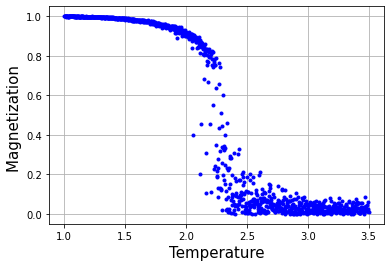

In [7]:
# Plot Monte Carlo simulation of mag
plt.plot(T, abs(np.array(mag)), '.', color="blue")
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Magnetization ", fontsize=15)
plt.grid()
plt.savefig('magnetization_MC.png')
plt.show()

In [8]:
#Confusion
random_state = 42
np.random.seed(random_state)
tf.set_random_seed(random_state)

#load the data generated
def load(filename):
    with open(filename + '.pickle', 'rb') as f:
        return pickle.load(f)

# Loading data
dataX = load('train_spins')
temp = load('temperature')
dim = len(temp)


In [9]:
# Parameters
learning_rate = 1e-2
l2 = 2 * 1e-5
epochs = 2000
disp_step = 100

# Network Parameters
hidden_n1 = 100 # 1st layer number of features
input_n = 16 * 16 # 2D Ising lattice
no_classes = 2 # high and low phase

# tf Graph input
x = tf.placeholder("float", [None, input_n])
y = tf.placeholder("float", [None, no_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([input_n, hidden_n1])),
    'out': tf.Variable(tf.random_normal([hidden_n1, no_classes]))
}
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[hidden_n1])),
    'out': tf.Variable(tf.constant(0.1, shape=[no_classes]))
}

# Create models
def single_sigmoid(x, weights, biases):
    layer_1 = tf.sigmoid(tf.matmul(x, weights['h1']) + biases['b1'])
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

def initialize_model(x, weights, biases):

    # Construct model, define cost and optimizer
    pred = single_sigmoid(x, weights, biases)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
    regularizer = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['out'])
    cost = tf.reduce_mean(cost + l2 * regularizer)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    return pred, cost, optimizer

step = 25 # Step in confusion scheme
accuracy = []

In [10]:
# Loop over proposed critical temperatures
for pos in range(0, dim, step):

    print('step {}'.format(pos),'/1000')

    # Initializing the variables
    pred, cost, optimizer = initialize_model(x, weights, biases)
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    # Generate label for training
    low = np.array([[0] * (dim - pos), [1] * (dim - pos)]).T
    high = np.array([[1] * pos, [0] * pos]).T
    data_y = np.vstack((low, high))

    # Take subset of data for training
    train_x, _, train_y, _ = train_test_split(dataX, data_y, train_size=0.1, random_state=random_state)

    for epoch in range(epochs):

        # Randomly shuffle training data
        perm = np.arange(len(train_x))
        np.random.shuffle(perm)
        train_x, train_y = train_x[perm], train_y[perm]

        # Train the network
        _, c = sess.run([optimizer, cost], feed_dict={x: train_x, y: train_y})

        # Display logs per epoch step
        #if epoch % disp_step == 0:
            #print("Epoch:", '%04d' % (epoch + 1), "Cost =", "{:.3f}".format(c))

    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy_tmp = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    accuracy.append(accuracy_tmp.eval({x: dataX, y: data_y}))
    sess.close()

step 0 /1000
step 25 /1000
step 50 /1000
step 75 /1000
step 100 /1000
step 125 /1000
step 150 /1000
step 175 /1000
step 200 /1000
step 225 /1000
step 250 /1000
step 275 /1000
step 300 /1000
step 325 /1000
step 350 /1000
step 375 /1000
step 400 /1000
step 425 /1000
step 450 /1000
step 475 /1000
step 500 /1000
step 525 /1000
step 550 /1000
step 575 /1000
step 600 /1000
step 625 /1000
step 650 /1000
step 675 /1000
step 700 /1000
step 725 /1000
step 750 /1000
step 775 /1000
step 800 /1000
step 825 /1000
step 850 /1000
step 875 /1000
step 900 /1000
step 925 /1000
step 950 /1000
step 975 /1000


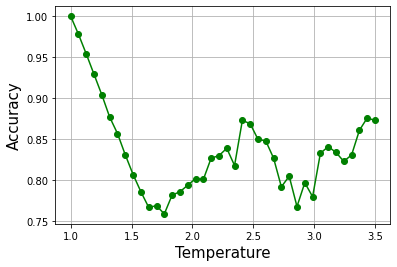

In [11]:
plt.plot(np.linspace(1., 3.5, len(accuracy)), accuracy, '-o', color="green")
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.savefig('confusion_NN.png')
plt.show()